In [ ]:
# Importing the necessary python libraries

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

# **Question 5**

In [ ]:
# Price of an ATM European call and put option using Heston Model and Monte-Carlo simulation

def SDE_vol(v0, kappa, theta, sigma, T, M, Ite, rand, row, cho_matrix):
    dt = T / M  # T = maturity, M = number of time steps
    v = np.zeros((M + 1, Ite), dtype=float)
    v[0] = v0
    sdt = np.sqrt(dt)  # Sqrt of dt
    np.random.seed(42)
    for t in range(1, M + 1):
        ran = np.dot(cho_matrix, rand[:, t])
        v[t] = np.maximum(
            0,
            v[t - 1]
            + kappa * (theta - v[t - 1]) * dt
            + np.sqrt(v[t - 1]) * sigma * ran[row] * sdt,
        )
    return v


def Heston_paths(S0, r, v, row, cho_matrix):
    S = np.zeros((M + 1, Ite), dtype=float)
    S[0] = S0
    sdt = np.sqrt(dt)
    for t in range(1, M + 1, 1):
        ran = np.dot(cho_matrix, rand[:, t])
        S[t] = S[t - 1] * np.exp((r - 0.5 * v[t]) * dt + np.sqrt(v[t]) * ran[row] * sdt)

    return S

def random_number_gen(M, Ite):
    rand = np.random.standard_normal((2, M + 1, Ite))
    return rand


def heston_call_mc(S, K, r, T, t):
    payoff = np.maximum(0, S[-1, :] - K)

    average = np.mean(payoff)

    return np.exp(-r * (T - t)) * average

def heston_put_mc(S, K, r, T, t):
    payoff = np.maximum(0, K - S[-1, :])

    average = np.mean(payoff)

    return np.exp(-r * (T - t)) * average

European Call Price under Heston at -0.3 correlation:  2.86
European Put Price under Heston at -0.3 correlation:  2.83


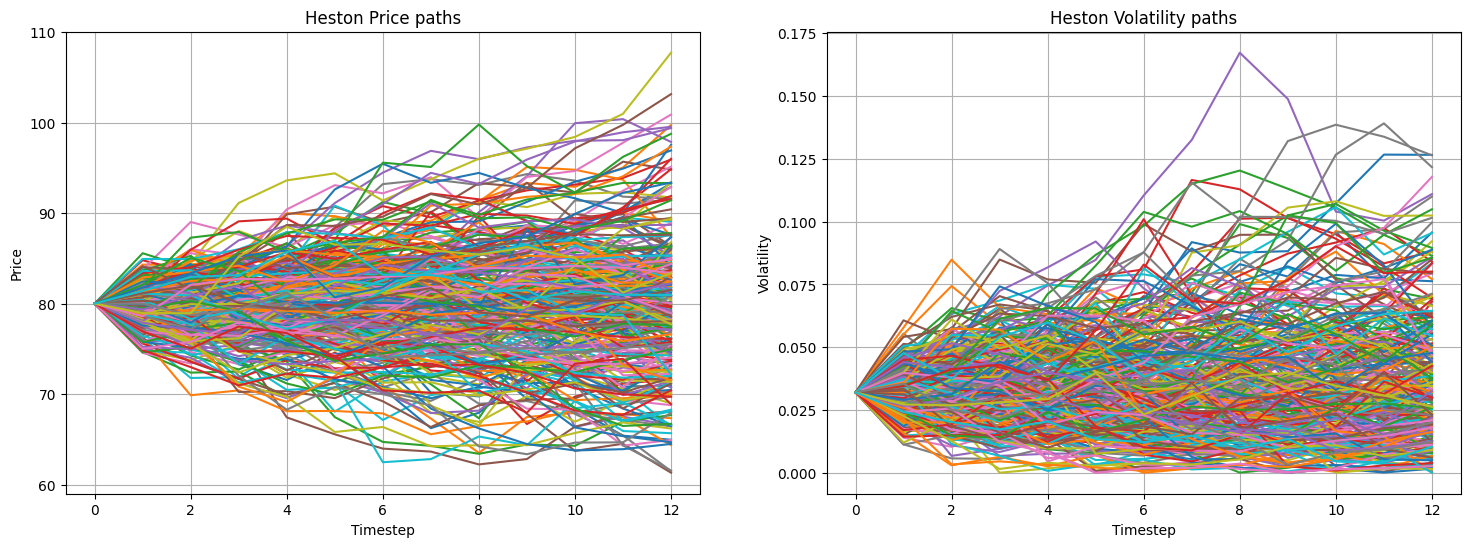

In [ ]:
# Price of ATM European call and put options using a correlation value of -0.30

v0 = 0.032
kappa_v = 1.85
sigma_v = 0.35
theta_v = 0.045
rho = -0.3
K=80

S0 = 80  # Current underlying asset price
r = 0.055  # Risk-free rate
M0 = 50  # Number of time steps in a year
T = 0.25  # Number of years
M = int(M0 * T)  # Total time steps
Ite = 1000000  # Number of simulations
dt = T / M  # Length of time step

# Generating random numbers from standard normal
np.random.seed(42)
rand = random_number_gen(M, Ite)

# Covariance Matrix
covariance_matrix = np.zeros((2, 2), dtype=float)
covariance_matrix[0] = [1.0, rho]
covariance_matrix[1] = [rho, 1.0]
cho_matrix = np.linalg.cholesky(covariance_matrix)

# Volatility process paths
V = SDE_vol(v0, kappa_v, theta_v, sigma_v, T, M, Ite, rand, 1, cho_matrix)

# Underlying price process paths
S = Heston_paths(S0, r, V, 0, cho_matrix)

Heston_Call_3 = round(heston_call_mc(S, 80, 0.055, 0.25, 0),2)
Heston_Put_3 = round(heston_put_mc(S, 80, 0.055, 0.25, 0),2)
print("European Call Price under Heston at -0.3 correlation: ", round(heston_call_mc(S, 80, 0.055, 0.25, 0),2))

print("European Put Price under Heston at -0.3 correlation: ", round(heston_put_mc(S, 80, 0.055, 0.25, 0),2))
def plot_paths(n):
    fig = plt.figure(figsize=(18, 6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    ax1.plot(range(len(S)), S[:, :n])
    ax1.grid()
    ax1.set_title("Heston Price paths")
    ax1.set_ylabel("Price")
    ax1.set_xlabel("Timestep")

    ax2.plot(range(len(V)), V[:, :n])
    ax2.grid()
    ax2.set_title("Heston Volatility paths")
    ax2.set_ylabel("Volatility")
    ax2.set_xlabel("Timestep")

plot_paths(300)

# Q7(a)

In [ ]:
# Calculating Greeks for options priced using Heston and Monte-Carlo models with correlation of -0.3

import numpy as np
import matplotlib.pyplot as plt

def heston_option_mc(S, K, r, T, t, option_type='call'):
    if option_type == 'call':
        payoff = np.maximum(0, S[-1, :] - K)
    else:
        payoff = np.maximum(0, K - S[-1, :])

    average = np.mean(payoff)
    return np.exp(-r * (T - t)) * average

def calculate_delta(S, K, r, T, t, option_type, S_change):
    original_price = heston_option_mc(S, K, r, T, t, option_type)
    S_up = S * (1 + S_change)
    S_down = S * (1 - S_change)

    price_up = heston_option_mc(S_up, K, r, T, t, option_type)
    price_down = heston_option_mc(S_down, K, r, T, t, option_type)

    delta_up = (price_up - original_price) / (S0 * S_change)
    delta_down = (original_price - price_down) / (S0 * S_change)

    return (delta_up + delta_down) / 2

def calculate_gamma(S, K, r, T, t, option_type, S_change):
    delta_original = calculate_delta(S, K, r, T, t, option_type, S_change)
    S_up = S * (1 + S_change)
    S_down = S * (1 - S_change)

    delta_up = calculate_delta(S_up, K, r, T, t, option_type, S_change)
    delta_down = calculate_delta(S_down, K, r, T, t, option_type, S_change)

    gamma = (delta_up - delta_down) / (S0 * S_change)

    return gamma

# Parameters
S_change = 0.01  # Change of 1% in stock price

# Calculate Delta and Gamma for Call
delta_call = calculate_delta(S, S0, r, T, 0, 'call', S_change)
gamma_call = calculate_gamma(S, S0, r, T, 0, 'call', S_change)

# Calculate Delta and Gamma for Put
delta_put = calculate_delta(S, S0, r, T, 0, 'put', S_change)
gamma_put = calculate_gamma(S, S0, r, T, 0, 'put', S_change)

print("Call Delta:", round(delta_call, 2))
print("Call Gamma:", round(gamma_call, 2))
print("Put Delta:", round(delta_put, 2))
print("Put Gamma:", round(gamma_put, 2))


Call Delta: 0.54
Call Gamma: 0.13
Put Delta: -0.45
Put Gamma: 0.1


# **Question 6**

European Call Price under Heston at -0.7 correlation:  2.08
European Put Price under Heston at -0.7 correlation:  3.45


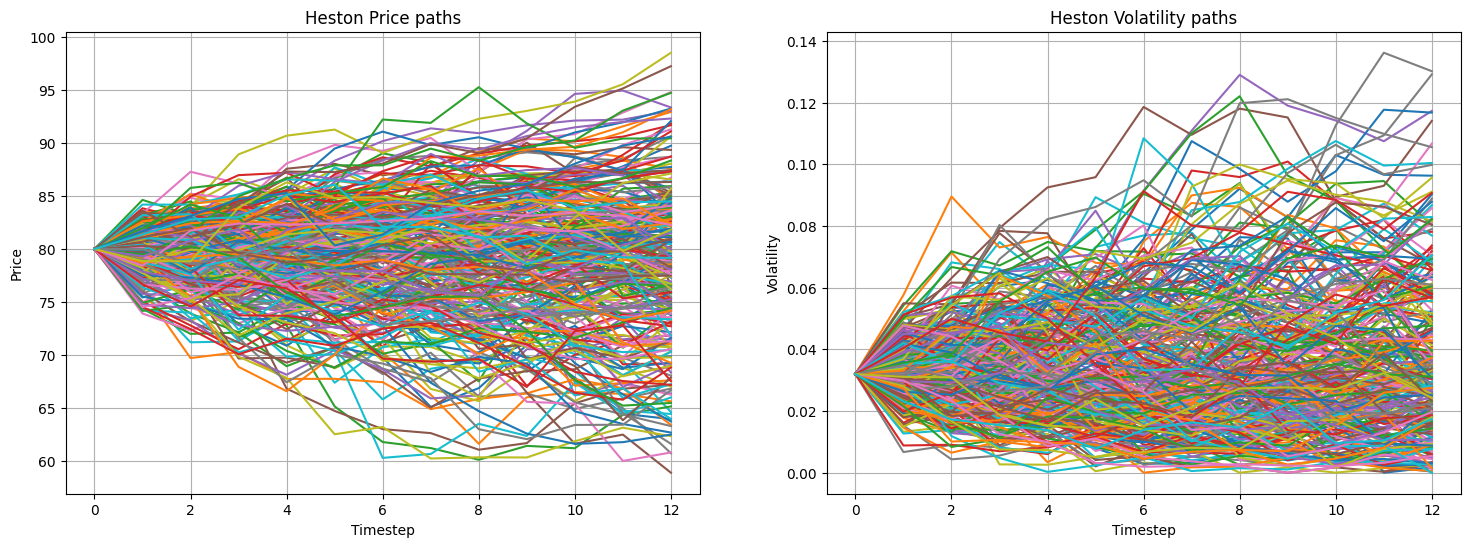

In [ ]:
# Price of ATM European call and put options using a correlation value of -0.70

v0 = 0.032
kappa_v = 1.85
sigma_v = 0.35
theta_v = 0.045
rho = -0.7

S0 = 80  # Current underlying asset price
K=80
r = 0.055  # Risk-free rate
M0 = 50  # Number of time steps in a year
T = 0.25  # Number of years
M = int(M0 * T)  # Total time steps
Ite = 1000000  # Number of simulations
dt = T / M  # Length of time step

# Generating random numbers from standard normal
np.random.seed(42)
rand = random_number_gen(M, Ite)

# Covariance Matrix
covariance_matrix = np.zeros((2, 2), dtype=float)
covariance_matrix[0] = [1.0, rho]
covariance_matrix[1] = [rho, 1.0]
cho_matrix = np.linalg.cholesky(covariance_matrix)

# Volatility process paths
V = SDE_vol(v0, kappa_v, theta_v, sigma_v, T, M, Ite, rand, 1, cho_matrix)

# Underlying price process paths
S = Heston_paths(S0, r, V, 0, cho_matrix)
Heston_Call_7 = round(heston_call_mc(S, 80, 0.055, 0.25, 0),2)
Heston_Put_7 = round(heston_put_mc(S, 80, 0.055, 0.25, 0),2)
print("European Call Price under Heston at -0.7 correlation: ", round(heston_call_mc(S, 80, 0.055, 0.25, 0),2))
print("European Put Price under Heston at -0.7 correlation: ", round(heston_put_mc(S, 80, 0.055, 0.25, 0),2))

def plot_paths(n):
    fig = plt.figure(figsize=(18, 6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    ax1.plot(range(len(S)), S[:, :n])
    ax1.grid()
    ax1.set_title("Heston Price paths")
    ax1.set_ylabel("Price")
    ax1.set_xlabel("Timestep")

    ax2.plot(range(len(V)), V[:, :n])
    ax2.grid()
    ax2.set_title("Heston Volatility paths")
    ax2.set_ylabel("Volatility")
    ax2.set_xlabel("Timestep")

plot_paths(300)

# Q7(b)

In [ ]:
# Calculating Greeks for options priced using Heston and Monte-Carlo models with correlation of -0.3

import numpy as np
import matplotlib.pyplot as plt

def heston_option_mc(S, K, r, T, t, option_type='call'):
    if option_type == 'call':
        payoff = np.maximum(0, S[-1, :] - K)
    else:
        payoff = np.maximum(0, K - S[-1, :])

    average = np.mean(payoff)
    return np.exp(-r * (T - t)) * average

def calculate_delta(S, K, r, T, t, option_type, S_change):
    original_price = heston_option_mc(S, K, r, T, t, option_type)
    S_up = S * (1 + S_change)
    S_down = S * (1 - S_change)

    price_up = heston_option_mc(S_up, K, r, T, t, option_type)
    price_down = heston_option_mc(S_down, K, r, T, t, option_type)

    delta_up = (price_up - original_price) / (S0 * S_change)
    delta_down = (original_price - price_down) / (S0 * S_change)

    return (delta_up + delta_down) / 2

def calculate_gamma(S, K, r, T, t, option_type, S_change):
    delta_original = calculate_delta(S, K, r, T, t, option_type, S_change)
    S_up = S * (1 + S_change)
    S_down = S * (1 - S_change)

    delta_up = calculate_delta(S_up, K, r, T, t, option_type, S_change)
    delta_down = calculate_delta(S_down, K, r, T, t, option_type, S_change)

    gamma = (delta_up - delta_down) / (S0 * S_change)

    return gamma

# Parameters
S_change = 0.01  # Change of 1% in stock price

# Calculate Delta and Gamma for Call
delta_call = calculate_delta(S, S0, r, T, 0, 'call', S_change)
gamma_call = calculate_gamma(S, S0, r, T, 0, 'call', S_change)

# Calculate Delta and Gamma for Put
delta_put = calculate_delta(S, S0, r, T, 0, 'put', S_change)
gamma_put = calculate_gamma(S, S0, r, T, 0, 'put', S_change)

print("Call Delta:", round(delta_call, 2))
print("Call Gamma:", round(gamma_call, 2))
print("Put Delta:", round(delta_put, 2))
print("Put Gamma:", round(gamma_put, 2))


Call Delta: 0.48
Call Gamma: 0.13
Put Delta: -0.49
Put Gamma: 0.1


## **Question 8**

In [ ]:
# Price of ATM European call and put option using Merton model with jump intensity of 0.75

import numpy as np

def merton_jump_paths(S0, r, sigma, T, lamb, muJ, deltaJ, n_paths, n_steps):
    dt = T / n_steps
    jump_intensity = lamb * (np.exp(muJ + 0.5 * deltaJ**2) - 1)

    paths = np.zeros((n_steps + 1, n_paths))
    paths[0] = S0
    np.random.seed(42)
    for t in range(1, n_steps + 1):
        normal_shocks = np.random.normal(0, 1, n_paths)
        jump_shocks = np.random.normal(muJ, deltaJ, n_paths)
        jump_sizes = np.random.poisson(lamb * dt, n_paths)

        paths[t] = paths[t-1] * np.exp((r - 0.5 * sigma**2 - jump_intensity) * dt + sigma * np.sqrt(dt) * normal_shocks + jump_shocks * jump_sizes)

    return paths

def european_call_merton(S0, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps):
    paths = merton_jump_paths(S0, r, sigma, T, lamb, muJ, deltaJ, n_paths, n_steps)
    # Payoff at maturity for European call option
    payoff = np.maximum(paths[-1] - K, 0)
    # Discount the payoff to present value
    return np.mean(payoff) * np.exp(-r * T)

def european_put_merton(S0, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps):
    dt = T / n_steps
    discount = np.exp(-r * T)
    paths = merton_jump_paths(S0, r, sigma, T, lamb, muJ, deltaJ, n_paths, n_steps)

    # Payoff at maturity for a European put
    payoff = np.maximum(K - paths[-1], 0)

    return np.mean(payoff) * discount

S0 = 80
K = 80
r = 0.055
sigma = 0.35
T = 3 / 12
lamb = 0.75
muJ = -0.5
deltaJ = 0.22
n_paths = 1000000
n_steps = 100

european_call_price = european_call_merton(S0, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps)
Merton_Call_75 = european_call_price
print(f"Merton European Call Option Price with jump intensity of 0.75: {european_call_price:.2f}")

european_put_price = european_put_merton(S0, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps)
Merton_Put_75 = european_put_price
print(f"Merton European Put Option Price jump intensity of 0.75: {european_put_price:.2f}")


Merton European Call Option Price with jump intensity of 0.75: 8.29
Merton European Put Option Price jump intensity of 0.75: 7.22


## **Question 9**

In [ ]:
# Price of ATM European call and put option using Merton model with jump intensity of 0.25

S0 = 80
K = 80
r = 0.055
sigma = 0.35
T = 3 / 12
lamb = 0.25
muJ = -0.5
deltaJ = 0.22
n_paths = 100000
n_steps = 100

european_call_price = european_call_merton(S0, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps)
Merton_Call_25 = european_call_price
print(f"Merton European Call Option Price with jump intensity of 0.25: {european_call_price:.2f}")

european_put_price = european_put_merton(S0, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps)
Merton_Put_25 = european_put_price
print(f"Merton European Put Option Price with jump intensity of 0.25: {european_put_price:.2f}")

Merton European Call Option Price with jump intensity of 0.25: 6.84
Merton European Put Option Price with jump intensity of 0.25: 5.75


## **Question 10**

In [ ]:
# Calculating Greeks for options priced using Merton models with jump intensities of 0.75 and 0.25

import numpy as np

np.random.seed(42)

# Function to simulate Merton model paths
def merton_paths(S0, r, sigma, T, lamb, muJ, deltaJ, n_paths, n_steps):
    dt = T / n_steps
    paths = np.zeros((n_steps + 1, n_paths))
    paths[0] = S0

    for t in range(1, n_steps + 1):
        normal_shocks = np.random.normal(0, 1, n_paths)
        jump_shocks = np.random.normal(muJ, deltaJ, n_paths)
        jump_sizes = np.random.poisson(lamb * dt, n_paths)

        paths[t] = paths[t-1] * np.exp((r - 0.5 * sigma**2 - lamb * (np.exp(muJ + 0.5 * deltaJ**2) - 1)) * dt + sigma * np.sqrt(dt) * normal_shocks + jump_shocks * jump_sizes)

    return paths

# Function to calculate European call option price using Merton model
def european_call_merton(S0, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps):
    paths = merton_paths(S0, r, sigma, T, lamb, muJ, deltaJ, n_paths, n_steps)
    payoff = np.maximum(paths[-1] - K, 0)
    discount_factor = np.exp(-r * T)
    return np.mean(payoff) * discount_factor

# Function to calculate European put option price using Merton model
def european_put_merton(S0, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps):
    paths = merton_paths(S0, r, sigma, T, lamb, muJ, deltaJ, n_paths, n_steps)
    payoff = np.maximum(K - paths[-1], 0)
    discount_factor = np.exp(-r * T)
    return np.mean(payoff) * discount_factor

# Function to compute Delta for a European option
def compute_delta(S0, deltaS, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps):
    C_S0_plus = european_call_merton(S0 + deltaS, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps)
    C_S0_minus = european_call_merton(S0 - deltaS, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps)
    Delta = (C_S0_plus - C_S0_minus) / (2 * deltaS)
    return Delta

# Function to compute Gamma for a European option
def compute_gamma(S0, deltaS, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps):
    C_S0 = european_call_merton(S0, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps)
    C_S0_plus = european_call_merton(S0 + deltaS, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps)
    C_S0_minus = european_call_merton(S0 - deltaS, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps)
    Gamma = (C_S0_plus - 2 * C_S0 + C_S0_minus) / deltaS**2
    return Gamma

# Function to compute Delta and Gamma for a European put option
def compute_put_delta_gamma(S0, deltaS, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps):
    P_S0 = european_put_merton(S0, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps)
    P_S0_plus = european_put_merton(S0 + deltaS, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps)
    P_S0_minus = european_put_merton(S0 - deltaS, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps)
    Delta = (P_S0_plus - P_S0_minus) / (2 * deltaS)
    Gamma = (P_S0_plus - 2 * P_S0 + P_S0_minus) / deltaS**2
    return Delta, Gamma

# Parameters
S0 = 80
K = 80
r = 0.055
sigma = 0.35
T = 3 / 12
lamb = 0.75
muJ = -0.5
deltaJ = 0.22
n_paths = 10000
n_steps = 100
deltaS = 0.001

Gamma = compute_gamma(S0, deltaS, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps)
print(f"Gamma of European call with intensity of 0.75: {Gamma:.2f}")

Delta = compute_delta(S0, deltaS, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps)
print(f"Delta of European call with intensity of 0.75: {Delta:.2f}")

Gamma = compute_gamma(S0, deltaS, K, r, T, sigma, 0.25, muJ, deltaJ, n_paths, n_steps)
print(f"Gamma of European call with intensity of 0.25: {Gamma:.2f}")

Delta = compute_delta(S0, deltaS, K, r, T, sigma, 0.25, muJ, deltaJ, n_paths, n_steps)
print(f"Delta of European call with intensity of 0.25: {Delta:.2f}")

Delta, Gamma = compute_put_delta_gamma(S0, deltaS, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps)
print(f"Delta of European put with intensity of 0.75: {Delta:.2f}")
print(f"Gamma of European put with intensity of 0.75: {Gamma:.2f}")

Delta, Gamma = compute_put_delta_gamma(S0, deltaS, K, r, T, sigma, 0.25, muJ, deltaJ, n_paths, n_steps)
print(f"Delta of European put with intensity of 0.25: {Delta:.2f}")
print(f"Gamma of European put with intensity of 0.25: {Gamma:.2f}")


Gamma of European call with intensity of 0.75: 560458.93
Delta of European call with intensity of 0.75: 94.01
Gamma of European call with intensity of 0.25: -63495.22
Delta of European call with intensity of 0.25: -93.47
Delta of European put with intensity of 0.75: -23.46
Gamma of European put with intensity of 0.75: 124309.50
Delta of European put with intensity of 0.25: 73.45
Gamma of European put with intensity of 0.25: -292010.44


## **Question 11**

In [ ]:
# Put-Call parity validator function for option price using Heston Model

def validate_put_call_parity(call_prices, put_prices, S0, K_values, r, T):

    parity_checks = []
    for call_price, put_price, K in zip(call_prices, put_prices, K_values):
        # Calculate the left and right side of the put-call parity equation
        left_side = call_price - put_price
        right_side = S0 - K * np.exp(-r * T)
        print(left_side)
        print(right_side)
        # Calculate the theoretical call and put prices based on the parity
        theoretical_call_price = np.round(put_price + S0 - K * np.exp(-r * T),2)
        theoretical_put_price = np.round(call_price - S0 + K * np.exp(-r * T),2)

        # Check if the put-call parity holds within a small tolerance
        parity_holds = np.isclose(left_side, right_side, atol=1e-1)

        # Append the check results to the list
        parity_checks.append({
            "strike": K,
            "parity_holds": parity_holds,
            "theoretical_call_price": theoretical_call_price,
            "theoretical_put_price": theoretical_put_price
        })

    return parity_checks

In [ ]:
# Put-Call parity test for option price using Heston Model with correlation of -0.3

parity_checks = validate_put_call_parity([Heston_Call_3], [Heston_Put_3], 80 , [80], r, T)
print("parity check result for ATM European option using Heston model with correlation of -0.3:")
print(f"Heston Call at -0.3 correlation is: {Heston_Call_3:.2f}")
print(f"Heston Put at -0.3 correlation is: {Heston_Put_3:.2f}")
print(parity_checks)

0.029999999999999805
1.092472042636473
parity check result for ATM European option using Heston model with correlation of -0.3:
Heston Call at -0.3 correlation is: 2.86
Heston Put at -0.3 correlation is: 2.83
[{'strike': 80, 'parity_holds': False, 'theoretical_call_price': 3.92, 'theoretical_put_price': 1.77}]


In [ ]:
# Put-Call parity test for option price using Heston Model with correlation of -0.7

parity_checks = validate_put_call_parity([Heston_Call_7], [Heston_Put_7], 80 , [80], r, T)
print("parity check result for ATM European option using Heston model with correlation of -0.7:")
print(f"Heston Call at -0.7 correlation is: {Heston_Call_7:.2f}")
print(f"Heston Put at -0.7 correlation is: {Heston_Put_7:.2f}")
print(parity_checks)

-1.37
1.092472042636473
parity check result for ATM European option using Heston model with correlation of -0.7:
Heston Call at -0.7 correlation is: 2.08
Heston Put at -0.7 correlation is: 3.45
[{'strike': 80, 'parity_holds': False, 'theoretical_call_price': 4.54, 'theoretical_put_price': 0.99}]


In [ ]:
# Put-Call parity test for option price using Merton Model with jump intensity of 0.75

parity_checks = validate_put_call_parity([Merton_Call_75], [Merton_Put_75], 80 , [80], r, T)
print("parity check result for ATM European call and put with jump intensity parameter 0.75:")
print(f"Merton Call at 0.75 jump is: {Merton_Call_75:.2f}")
print(f"Merton Put at 0.75 jump is: {Merton_Put_75:.2f}")
print(parity_checks)

1.06784670042763
1.092472042636473
parity check result for ATM European call and put with jump intensity parameter 0.75:
Merton Call at 0.75 jump is: 8.29
Merton Put at 0.75 jump is: 7.22
[{'strike': 80, 'parity_holds': True, 'theoretical_call_price': 8.32, 'theoretical_put_price': 7.2}]


In [ ]:
# Put-Call parity test for option price using Merton Model with jump intensity of 0.25

parity_checks = validate_put_call_parity([Merton_Call_25], [Merton_Put_25], 80 , [80], r, T)
print("parity check result for ATM European call and put with jump intensity parameter 0.25:")
print(f"Merton Call at 0.25 jump is: {Merton_Call_25:.2f}")
print(f"Merton Put at 0.25 jump is: {Merton_Put_25:.2f}")
print(parity_checks)

1.0932968303878914
1.092472042636473
parity check result for ATM European call and put with jump intensity parameter 0.25:
Merton Call at 0.25 jump is: 6.84
Merton Put at 0.25 jump is: 5.75
[{'strike': 80, 'parity_holds': True, 'theoretical_call_price': 6.84, 'theoretical_put_price': 5.75}]


## **Question 12**

In [ ]:
!pip install tabulate
import numpy as np
from tabulate import tabulate


### **Question 12 (a)**

In [ ]:
#Heston model for different level of moneyness at correclation of -0.3

rho = -0.3

# Generating random numbers from standard normal
np.random.seed(42)
rand = random_number_gen(M, Ite)

# Covariance Matrix
covariance_matrix = np.zeros((2, 2), dtype=float)
covariance_matrix[0] = [1.0, rho]
covariance_matrix[1] = [rho, 1.0]
cho_matrix = np.linalg.cholesky(covariance_matrix)

# Volatility process paths
V = SDE_vol(v0, kappa_v, theta_v, sigma_v, T, M, Ite, rand, 1, cho_matrix)

# Underlying price process paths
S = Heston_paths(S0, r, V, 0, cho_matrix)

moneyness = [0.85, 0.90, 0.95, 1, 1.05, 1.10]
strike_prices = [(S0/i) for i in moneyness] # Deep OTM, OTM, ATM, ITM, Deep ITM

Heston_Call = [heston_call_mc(S, K, 0.055, 0.25, 0) for K in strike_prices]
Heston_Put = [heston_put_mc(S, K, 0.055, 0.25, 0) for K in strike_prices]

table_data = zip(np.round(moneyness, 2), np.round(Heston_Call, 2), np.round(Heston_Put, 2))
headers = ["Moneyness", "Heston European Call Price", "Heston European Put Price"]
table = tabulate(table_data, headers=headers, tablefmt="fancy_grid")
print("European Call and Put Option Prices using Heston Model with Correlation of -0.3 at Various Level of Moneyness")
print(table)

European Call and Put Option Prices using Heston Model with Correlation of -0.3 at Various Level of Moneyness
╒═════════════╤══════════════════════════════╤═════════════════════════════╕
│   Moneyness │   Heston European Call Price │   Heston European Put Price │
╞═════════════╪══════════════════════════════╪═════════════════════════════╡
│        0.85 │                         0.1  │                       14    │
├─────────────┼──────────────────────────────┼─────────────────────────────┤
│        0.9  │                         0.41 │                        9.15 │
├─────────────┼──────────────────────────────┼─────────────────────────────┤
│        0.95 │                         1.24 │                        5.36 │
├─────────────┼──────────────────────────────┼─────────────────────────────┤
│        1    │                         2.86 │                        2.83 │
├─────────────┼──────────────────────────────┼─────────────────────────────┤
│        1.05 │                         5.1

In [ ]:
#Heston model for different level of moneyness at correlation of -0.7
rho = -0.7

# Generating random numbers from standard normal
np.random.seed(42)
rand = random_number_gen(M, Ite)

# Covariance Matrix
covariance_matrix = np.zeros((2, 2), dtype=float)
covariance_matrix[0] = [1.0, rho]
covariance_matrix[1] = [rho, 1.0]
cho_matrix = np.linalg.cholesky(covariance_matrix)

# Volatility process paths
V = SDE_vol(v0, kappa_v, theta_v, sigma_v, T, M, Ite, rand, 1, cho_matrix)

# Underlying price process paths
S = Heston_paths(S0, r, V, 0, cho_matrix)

moneyness = [0.85, 0.90, 0.95, 1.00, 1.05, 1.10]
strike_prices = [(S0/i) for i in moneyness] # Deep OTM, OTM, ATM, ITM, Deep ITM

Heston_Call = [heston_call_mc(S, K, 0.055, 0.25, 0) for K in strike_prices]
Heston_Put = [heston_put_mc(S, K, 0.055, 0.25, 0) for K in strike_prices]

table_data = zip(np.round(moneyness, 2), np.round(Heston_Call, 2), np.round(Heston_Put, 2))
headers = ["Moneyness", "Heston European Call Price", "Heston European Put Price"]
table = tabulate(table_data, headers=headers, tablefmt="fancy_grid")
print("European Call and Put Option Prices using Heston Model with Correlation of -0.7 at Various Level of Moneyness")
print(table)

European Call and Put Option Prices using Heston Model with Correlation of -0.7 at Various Level of Moneyness
╒═════════════╤══════════════════════════════╤═════════════════════════════╕
│   Moneyness │   Heston European Call Price │   Heston European Put Price │
╞═════════════╪══════════════════════════════╪═════════════════════════════╡
│        0.85 │                         0.01 │                       15.31 │
├─────────────┼──────────────────────────────┼─────────────────────────────┤
│        0.9  │                         0.12 │                       10.26 │
├─────────────┼──────────────────────────────┼─────────────────────────────┤
│        0.95 │                         0.68 │                        6.21 │
├─────────────┼──────────────────────────────┼─────────────────────────────┤
│        1    │                         2.08 │                        3.45 │
├─────────────┼──────────────────────────────┼─────────────────────────────┤
│        1.05 │                         4.2

### **Question 12 (b)**

In [ ]:
# Merton model for different level of moneyness at jump intensity of 0.75

def merton_jump_paths(S0, r, sigma, T, lamb, muJ, deltaJ, n_paths, n_steps):
    dt = T / n_steps
    jump_intensity = lamb * (np.exp(muJ + 0.5 * deltaJ**2) - 1)

    paths = np.zeros((n_steps + 1, n_paths))
    paths[0] = S0
    np.random.seed(42)
    for t in range(1, n_steps + 1):
        normal_shocks = np.random.normal(0, 1, n_paths)
        jump_shocks = np.random.normal(muJ, deltaJ, n_paths)
        jump_sizes = np.random.poisson(lamb * dt, n_paths)

        paths[t] = paths[t-1] * np.exp((r - 0.5 * sigma**2 - jump_intensity) * dt + sigma * np.sqrt(dt) * normal_shocks + jump_shocks * jump_sizes)

    return paths

def european_call_merton(S0, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps):
    paths = merton_jump_paths(S0, r, sigma, T, lamb, muJ, deltaJ, n_paths, n_steps)
    # Payoff at maturity for European call option
    payoff = np.maximum(paths[-1] - K, 0)
    # Discount the payoff to present value
    return np.mean(payoff) * np.exp(-r * T)

def european_put_merton(S0, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps):
    dt = T / n_steps
    discount = np.exp(-r * T)
    paths = merton_jump_paths(S0, r, sigma, T, lamb, muJ, deltaJ, n_paths, n_steps)

    # Payoff at maturity for a European put
    payoff = np.maximum(K - paths[-1], 0)

    return np.mean(payoff) * discount

lamb = 0.75

moneyness = [0.85, 0.90, 0.95, 1.00, 1.05, 1.10]
strike_prices = [(S0/i) for i in moneyness] # Deep OTM, OTM, ATM, ITM, Deep ITM

Merton_Call = [european_call_merton(S0, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps) for K in strike_prices]
Merton_Put = [european_put_merton(S0, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps) for K in strike_prices]

table_data = zip(np.round(moneyness, 2), np.round(Merton_Call, 2), np.round(Merton_Put, 2))
headers = ["Moneyness", "Merton European Call Price", "Merton European Put Price"]
table = tabulate(table_data, headers=headers, tablefmt="fancy_grid")
print("European Call and Put Option Prices using Merton Model with Jump of 0.75 at Various Level of Moneyness")
print(table)

European Call and Put Option Prices using Merton Model with Jump of 0.75 at Various Level of Moneyness
╒═════════════╤══════════════════════════════╤═════════════════════════════╕
│   Moneyness │   Merton European Call Price │   Merton European Put Price │
╞═════════════╪══════════════════════════════╪═════════════════════════════╡
│        0.85 │                         2.76 │                       15.86 │
├─────────────┼──────────────────────────────┼─────────────────────────────┤
│        0.9  │                         4.27 │                       12.21 │
├─────────────┼──────────────────────────────┼─────────────────────────────┤
│        0.95 │                         6.09 │                        9.41 │
├─────────────┼──────────────────────────────┼─────────────────────────────┤
│        1    │                         8.14 │                        7.31 │
├─────────────┼──────────────────────────────┼─────────────────────────────┤
│        1.05 │                        10.35 │    

In [ ]:
# Merton model for different level of moneyness at jump intensity of 0.25

def merton_jump_paths(S0, r, sigma, T, lamb, muJ, deltaJ, n_paths, n_steps):
    dt = T / n_steps
    jump_intensity = lamb * (np.exp(muJ + 0.5 * deltaJ**2) - 1)

    paths = np.zeros((n_steps + 1, n_paths))
    paths[0] = S0
    np.random.seed(42)
    for t in range(1, n_steps + 1):
        normal_shocks = np.random.normal(0, 1, n_paths)
        jump_shocks = np.random.normal(muJ, deltaJ, n_paths)
        jump_sizes = np.random.poisson(lamb * dt, n_paths)

        paths[t] = paths[t-1] * np.exp((r - 0.5 * sigma**2 - jump_intensity) * dt + sigma * np.sqrt(dt) * normal_shocks + jump_shocks * jump_sizes)

    return paths

def european_call_merton(S0, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps):
    paths = merton_jump_paths(S0, r, sigma, T, lamb, muJ, deltaJ, n_paths, n_steps)
    # Payoff at maturity for European call option
    payoff = np.maximum(paths[-1] - K, 0)
    # Discount the payoff to present value
    return np.mean(payoff) * np.exp(-r * T)

def european_put_merton(S0, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps):
    dt = T / n_steps
    discount = np.exp(-r * T)
    paths = merton_jump_paths(S0, r, sigma, T, lamb, muJ, deltaJ, n_paths, n_steps)

    # Payoff at maturity for a European put
    payoff = np.maximum(K - paths[-1], 0)

    return np.mean(payoff) * discount

lamb = 0.25

moneyness = [0.85, 0.90, 0.95, 1.00, 1.05, 1.10]
strike_prices = [(S0/i) for i in moneyness] # Deep OTM, OTM, ATM, ITM, Deep ITM

Merton_Call = [european_call_merton(S0, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps) for K in strike_prices]
Merton_Put = [european_put_merton(S0, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps) for K in strike_prices]

table_data = zip(np.round(moneyness, 2), np.round(Merton_Call, 2), np.round(Merton_Put, 2))
headers = ["Moneyness", "Merton European Call Price", "Merton European Put Price"]
table = tabulate(table_data, headers=headers, tablefmt="fancy_grid")
print("European Call and Put Option Prices using Merton Model with jump of 0.25 at Various Level of Moneyness")
print(table)

European Call and Put Option Prices using Merton Model with jump of 0.25 at Various Level of Moneyness
╒═════════════╤══════════════════════════════╤═════════════════════════════╕
│   Moneyness │   Merton European Call Price │   Merton European Put Price │
╞═════════════╪══════════════════════════════╪═════════════════════════════╡
│        0.85 │                         2.01 │                       14.83 │
├─────────────┼──────────────────────────────┼─────────────────────────────┤
│        0.9  │                         3.3  │                       10.96 │
├─────────────┼──────────────────────────────┼─────────────────────────────┤
│        0.95 │                         4.93 │                        7.98 │
├─────────────┼──────────────────────────────┼─────────────────────────────┤
│        1    │                         6.86 │                        5.75 │
├─────────────┼──────────────────────────────┼─────────────────────────────┤
│        1.05 │                         8.98 │    

## **Question 13**

European Call Price under Heston at -0.3 correlation:  2.86
European Put Price under Heston at -0.3 correlation:  2.83
American Call Price: 2.85
American Put Price: 2.83


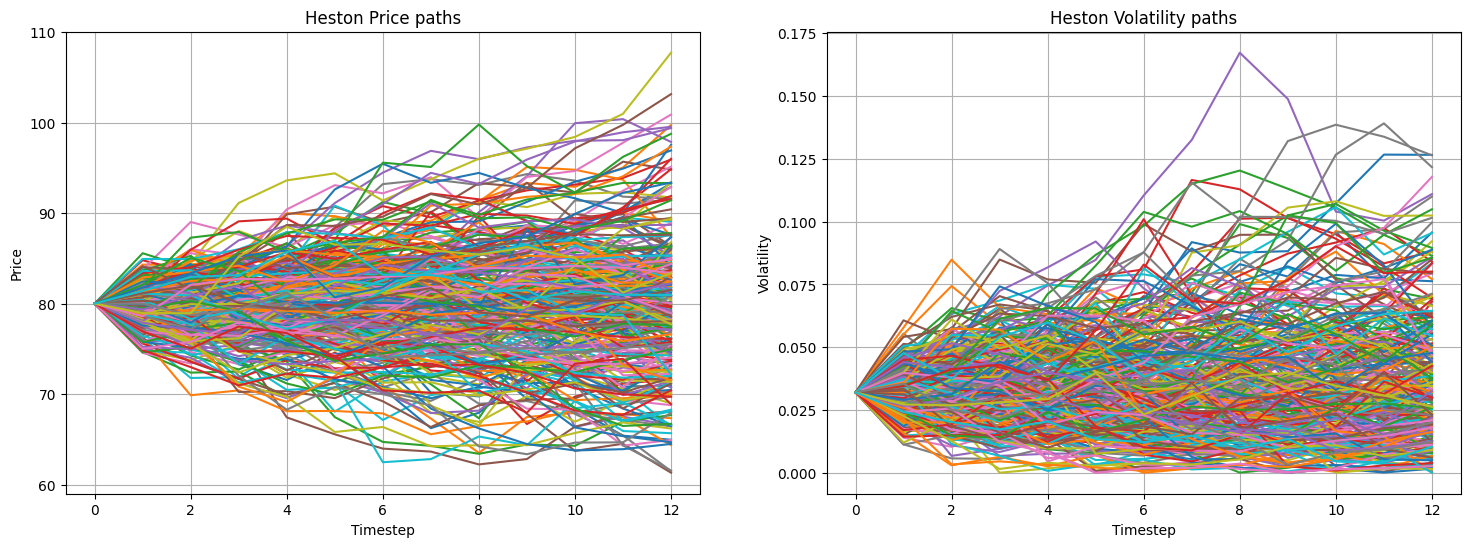

In [ ]:
import numpy as np
import numpy.polynomial.polynomial as poly

# Price of ATM European call and put options using a correlation value of -0.70

v0 = 0.032
kappa_v = 1.85
sigma_v = 0.35
theta_v = 0.045
rho = -0.3

S0 = 80  # Current underlying asset price
K=80
r = 0.055  # Risk-free rate
M0 = 50  # Number of time steps in a year
T = 0.25  # Number of years
M = int(M0 * T)  # Total time steps
Ite = 1000000  # Number of simulations
dt = T / M  # Length of time step

# Generating random numbers from standard normal
np.random.seed(42)
rand = random_number_gen(M, Ite)

# Covariance Matrix
covariance_matrix = np.zeros((2, 2), dtype=float)
covariance_matrix[0] = [1.0, rho]
covariance_matrix[1] = [rho, 1.0]
cho_matrix = np.linalg.cholesky(covariance_matrix)

# Volatility process paths
V = SDE_vol(v0, kappa_v, theta_v, sigma_v, T, M, Ite, rand, 1, cho_matrix)

# Underlying price process paths
S = Heston_paths(S0, r, V, 0, cho_matrix)
Heston_Call_7 = round(heston_call_mc(S, 80, 0.055, 0.25, 0),2)
Heston_Put_7 = round(heston_put_mc(S, 80, 0.055, 0.25, 0),2)
print("European Call Price under Heston at -0.3 correlation: ", round(heston_call_mc(S, 80, 0.055, 0.25, 0),2))
print("European Put Price under Heston at -0.3 correlation: ", round(heston_put_mc(S, 80, 0.055, 0.25, 0),2))

def plot_paths(n):
    fig = plt.figure(figsize=(18, 6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    ax1.plot(range(len(S)), S[:, :n])
    ax1.grid()
    ax1.set_title("Heston Price paths")
    ax1.set_ylabel("Price")
    ax1.set_xlabel("Timestep")

    ax2.plot(range(len(V)), V[:, :n])
    ax2.grid()
    ax2.set_title("Heston Volatility paths")
    ax2.set_ylabel("Volatility")
    ax2.set_xlabel("Timestep")

plot_paths(300)

def regression_fit(spot_prices, future_values, degree=2):
    """
    Fits a least-squares regression to estimate continuation values.

    :param spot_prices: array of spot prices at the current time step
    :param future_values: array of option values at the next time step
    :param degree: degree of the polynomial to fit
    :return: estimated continuation values
    """
    # Fit a polynomial regression model to the spot prices and future values
    coefs = poly.polyfit(spot_prices, future_values, degree)
    # Use the fitted model to estimate continuation values for the current spot prices
    continuation_values = poly.polyval(spot_prices, coefs)
    return continuation_values

def american_option_mc(S_paths, K, r, T, M, option_type='call',degree=2):
    dt = T / M
    if option_type == 'call':
        payoff = np.maximum(S_paths - K, 0)  # Intrinsic value for calls
    else:
        payoff = np.maximum(K - S_paths, 0)  # Intrinsic value for puts

    option_value = np.copy(payoff)  # Initialize with intrinsic value

    # Backward induction to determine optimal exercise strategy
    for t in reversed(range(M)):  # M is the number of time steps
        in_the_money = payoff[t] > 0
        spot_prices = S_paths[t][in_the_money]
        future_values = option_value[t+1][in_the_money] * np.exp(-r * dt)
        # Make sure we have enough points for regression
        if len(spot_prices) > degree:  # Need more points than the polynomial degree
            continuation_values = regression_fit(spot_prices, future_values, degree)
            exercise = payoff[t][in_the_money] > continuation_values
            option_value[t][in_the_money] = np.where(exercise, payoff[t][in_the_money], future_values)
        option_value[t][~in_the_money] = option_value[t+1][~in_the_money] * np.exp(-r * dt)  # Discount the out-of-the-money paths

    return np.mean(option_value[0])

# ... (Generate Heston model paths)

# Now call the American option pricing function
american_call_price = american_option_mc(S, K, r, T, M, 'call')
american_put_price = american_option_mc(S, K, r, T, M, 'put')
print(f"American Call Price: {american_call_price:.2f}")
print(f"American Put Price: {american_put_price:.2f}")


In [ ]:
# Price of ATM European call and put option using Merton model with jump intensity of 0.75

import numpy as np

def merton_jump_paths(S0, r, sigma, T, lamb, muJ, deltaJ, n_paths, n_steps):
    dt = T / n_steps
    jump_intensity = lamb * (np.exp(muJ + 0.5 * deltaJ**2) - 1)

    paths = np.zeros((n_steps + 1, n_paths))
    paths[0] = S0
    np.random.seed(42)
    for t in range(1, n_steps + 1):
        normal_shocks = np.random.normal(0, 1, n_paths)
        jump_shocks = np.random.normal(muJ, deltaJ, n_paths)
        jump_sizes = np.random.poisson(lamb * dt, n_paths)

        paths[t] = paths[t-1] * np.exp((r - 0.5 * sigma**2 - jump_intensity) * dt + sigma * np.sqrt(dt) * normal_shocks + jump_shocks * jump_sizes)

    return paths

def european_call_merton(S0, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps):
    paths = merton_jump_paths(S0, r, sigma, T, lamb, muJ, deltaJ, n_paths, n_steps)
    # Payoff at maturity for European call option
    payoff = np.maximum(paths[-1] - K, 0)
    # Discount the payoff to present value
    return np.mean(payoff) * np.exp(-r * T)

def european_put_merton(S0, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps):
    dt = T / n_steps
    discount = np.exp(-r * T)
    paths = merton_jump_paths(S0, r, sigma, T, lamb, muJ, deltaJ, n_paths, n_steps)

    # Payoff at maturity for a European put
    payoff = np.maximum(K - paths[-1], 0)

    return np.mean(payoff) * discount

S0 = 80
K = 80
r = 0.055
sigma = 0.35
T = 3 / 12
lamb = 0.75
muJ = -0.5
deltaJ = 0.22
n_paths = 1000000
n_steps = 100

european_call_price = european_call_merton(S0, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps)
Merton_Call_75 = european_call_price
print(f"Merton European Call Option Price with jump intensity of 0.75: {european_call_price:.2f}")

european_put_price = european_put_merton(S0, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps)
Merton_Put_75 = european_put_price
print(f"Merton European Put Option Price jump intensity of 0.75: {european_put_price:.2f}")


import numpy as np

# ... (Include the function merton_jump_paths from your original code here)

def american_option_merton_approx(S_paths, K, r, T, sigma, lamb, muJ, deltaJ, n_steps, option_type='call'):
    dt = T / n_steps
    if option_type == 'call':
        payoff = np.maximum(S_paths - K, 0)  # Intrinsic value for calls
    else:
        payoff = np.maximum(K - S_paths, 0)  # Intrinsic value for puts

    option_value = np.copy(payoff)  # Initialize with intrinsic value

    # Early exercise approximation
    for t in reversed(range(n_steps)):  # Exclude last step because it's already known
        discounted_option_value = np.exp(-r * dt) * option_value[t + 1]
        intrinsic_value = payoff[t]
        option_value[t] = np.maximum(intrinsic_value, discounted_option_value)

    # The price of the option is the discounted expected payoff, considering early exercise
    return np.mean(option_value[0])

# Set the parameters for the Merton model
S0 = 80  # Initial stock price
K = 80   # Strike price
r = 0.055  # Risk-free interest rate
sigma = 0.35  # Volatility of the underlying stock
T = 3 / 12  # Time to maturity in years
lamb = 0.75  # Jump intensity
muJ = -0.5  # Mean jump size
deltaJ = 0.22  # Standard deviation of jump size
n_paths = 1000000  # Number of simulated paths
n_steps = 100  # Number of time steps in the path

# Generate the simulated paths using the Merton model
S_paths = merton_jump_paths(S0, r, sigma, T, lamb, muJ, deltaJ, n_paths, n_steps)

# Price the American call option using the approximate method
american_call_price_approx = american_option_merton_approx(
    S_paths, K, r, T, sigma, lamb, muJ, deltaJ, n_steps, option_type='call'
)
print(f"Approximated American Call Option Price: {american_call_price_approx:.2f}")

# Price the American put option using the approximate method
american_put_price_approx = american_option_merton_approx(
    S_paths, K, r, T, sigma, lamb, muJ, deltaJ, n_steps, option_type='put'
)
print(f"Approximated American Put Option Price: {american_put_price_approx:.2f}")



Merton European Call Option Price with jump intensity of 0.75: 8.29
Merton European Put Option Price jump intensity of 0.75: 7.22
Approximated American Call Option Price: 14.13
Approximated American Put Option Price: 11.60


## **Question 14**

In [ ]:
# European call prices obtained from Heston model with that obatined using up-and-in (UAI) with a barrier level of $95 and a strike price of $95

def heston_paths(S0, r, nu0, kappa_nu, theta_nu, rho, T, n_paths, n_steps):
    dt = T / n_steps
    paths = np.zeros((n_steps + 1, n_paths))
    paths[0] = S0
    nu = np.full((n_steps + 1, n_paths), nu0)

    for t in range(1, n_steps + 1):
        Z1 = np.random.normal(size=n_paths)
        Z2 = rho * Z1 + np.sqrt(1 - rho ** 2) * np.random.normal(size=n_paths)

        dS = r * paths[t - 1] * dt + np.sqrt(nu[t - 1]) * paths[t - 1] * np.sqrt(dt) * Z1
        dNu = kappa_nu * (theta_nu - nu[t - 1]) * dt + np.sqrt(nu[t - 1] * dt) * Z2

        paths[t] = paths[t - 1] + dS
        nu[t] = np.maximum(nu[t - 1] + dNu, 0)  # Variance can't be negative

    return paths

def european_up_and_in_call_heston(S0, K, B, r, nu0, kappa_nu, theta_nu, rho, T, n_paths, n_steps):
    # Simulate paths using Heston model
    paths = heston_paths(S0, r, nu0, kappa_nu, theta_nu, rho, T, n_paths, n_steps)
    # Initialize payoff
    payoff = np.zeros(n_paths)

    # Iterate through paths to check if barrier is crossed
    for i in range(n_paths):
        if np.any(paths[:, i] >= B):
            payoff[i] = np.maximum(paths[-1, i] - K, 0)

    # Calculate option price as the mean of the payoffs
    option_price = np.mean(payoff) * np.exp(-r * T)

    return option_price

S0 = 80
K = 95
B = 95
r = 0.055
nu0 = 0.032
kappa_nu = 1.85
theta_nu = 0.045
rho = -0.70
T = 3 / 12
n_paths = 10000
n_steps = 100

# Calculate the price of the European up-and-in call option using the Heston model
UAI_option_price = european_up_and_in_call_heston(S0, K, B, r, nu0, kappa_nu, theta_nu, rho, T, n_paths, n_steps)

# Print the price of the European up-and-in call option
print(f"Price of the European up-and-in call option: {UAI_option_price:.2f}")

Price of the European up-and-in call option: 0.03


## **Question 15**

In [ ]:
# Comparison of European Put prices obtained from Merton model with that obatined using down-and-in (DAI) with a barrier level of $65 and a strike price of $65

def merton_jump_paths(S0, r, sigma, T, lamb, muJ, deltaJ, n_paths, n_steps): # Function that generates Merton jump diffusion paths for the asset price.
    dt = T / n_steps # Time steps
    jump_intensity = lamb * (np.exp(muJ + 0.5 * deltaJ**2) - 1) # Jump intensity

    # Initializes a 2D NumPy array (paths) to store the asset price paths for each simulation
    paths = np.zeros((n_steps + 1, n_paths))
    paths[0] = S0

    # Loop to iterate through each time step to generate the paths, random shocks for the normal diffusion component, jump component, and jump sizes
    np.random.seed(42)
    for t in range(1, n_steps + 1):
        normal_shocks = np.random.normal(0, 1, n_paths)
        jump_shocks = np.random.normal(muJ, deltaJ, n_paths)
        jump_sizes = np.random.poisson(lamb * dt, n_paths)

        #Update the asset price paths using the Merton jump diffusion formula
        paths[t] = paths[t-1] * np.exp((r - 0.5 * sigma**2 - jump_intensity) * dt + sigma * np.sqrt(dt) * normal_shocks + jump_shocks * jump_sizes)

    return paths # Returns the generated paths

# Function to calculate the price of a European put option using the Merton jump diffusion model
def european_put_merton(S0, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps):
    dt = T / n_steps  # Time steps
    discount = np.exp(-r * T) # Discount factor
    paths = merton_jump_paths(S0, r, sigma, T, lamb, muJ, deltaJ, n_paths, n_steps) # Generates Merton jump paths

    payoff = np.maximum(K - paths[-1], 0) # Payoff at maturity for a European put

    return np.mean(payoff) * discount # Returns the discounted mean payoff

def dai_put_merton(S0, K, B, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps):
    dt = T / n_steps
    discount = np.exp(-r * T)
    paths = merton_jump_paths(S0, r, sigma, T, lamb, muJ, deltaJ, n_paths, n_steps)

    # Check if barrier is reached at any point before maturity
    barrier_hit = np.any(np.min(paths, axis=0) <= B)

    # Determine payoff based on if barrier is hit or not
    if barrier_hit:
        payoff = np.maximum(K - paths[-1], 0)
    else:
        payoff = np.zeros(n_paths)

    return np.mean(payoff) * discount

# Parameters
S0 = 80
K = 65  # Strike price
B = 65  # Barrier level
r = 0.055
sigma = 0.35
T = 3 / 12
lamb = 0.75
muJ = -0.5
deltaJ = 0.22
n_paths = 1000000
n_steps = 100

# Calculate prices
european_put_price = european_put_merton(S0, K, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps)
dai_put_price = dai_put_merton(S0, K, B, r, T, sigma, lamb, muJ, deltaJ, n_paths, n_steps)

# Display results
print(f"Merton European Put Option Price: {european_put_price:.2f}")
print(f"Merton DAI Put Option Price with Barrier at {B}: {dai_put_price:.2f}")

Merton European Put Option Price: 2.77
Merton DAI Put Option Price with Barrier at 65: 2.77
